Roll No.: 20bce316 Vidhisha Amle
          20bce299 Trusha Vithlani
          20bce298 Tisha Kotadia
          
Topic: Number Plate Recognition 

In [1]:
#installing dependencies
#this imutils helps with the contours once we get detected
!pip install easyocr
!pip install imutils

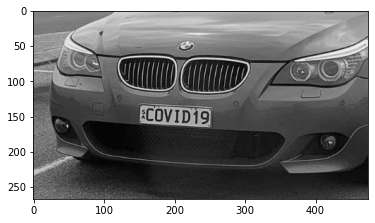

In [5]:
#importing other dependencies 
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

#reading image
img = cv2.imread("C:\\Users\\vidhi\\Desktop\\image2.jpg") 
#recoloring
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


The number plate is: 
 [([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275641079442608)]


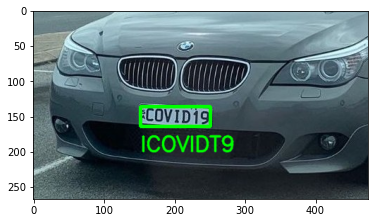

In [6]:
#applying filter and find edges for localization
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

#find contours and apply mask
#findContours goes through image and helps to find shapes effectively
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

#Applying filters and finding edges for localization
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

#Finding contours and applying mask
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

#reading text
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print("The number plate is: \n", result)

#Render result
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))